In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1> 행정구역별 의료기관 현황 분석하기 </h1>


*   공공데이터 활용 : 보건복지부_공공보건 의료기관 현황
*   국가통계포털 사이트 '행정구역 주소 체계' 데이터 수집


In [3]:
import pandas as pd
import numpy as np

data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/MediGeoData/보건복지부_공공보건 의료기관 현황_20161231.csv', index_col=0, encoding='cp949',
engine='python')

data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


<h3> ▶︎ 데이터 프레임[‘열이름’].apply(함수명)를 사용하여 특정 열의 값을 편집하여 가져와 addr 데이터 프레임 생성 </h3>

In [4]:
addr=pd.DataFrame(data['주소'].apply(lambda v:v.split()[0:2]).tolist(),columns=('sido','gugun'))
addr.head()

,sido,gugun
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


<h3> ▶︎ 주소 체계에 맞지 않는 데이터 수정 [iloc] </h3>

* sido 데이터
  * 시 데이터
    * 예시) 경산시 → 경상북도 경산시
  * 도 데이터
    * 예시) 경기 → 경기도
* gungu 데이터
  * 예시) 제주특별자치도 아란13길 → 제주특별자치도 제주시

In [5]:
addr['sido'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [6]:
addr[addr['sido'].isin(['경산시', '창원시', '천안시'])]

,sido,gugun
27,창원시,의창구
31,창원시,마산합포구3.15대로
47,경산시,경안로
209,천안시,동남구
210,천안시,동남구


In [7]:
addr.iloc[27]=['경상남도','창원시']
addr.iloc[31]=['경상남도','창원시']
addr.iloc[47]=['경상북도','경산시']
addr.iloc[209]=['경상남도','천안시']
addr.iloc[210]=['경상남도','천안시']
addr['sido'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [8]:
addr_aliases = {'경기':'경기도','경남':'경상남도', '경북':'경상북도',
'충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시',
'대전시':'대전광역시', '충남':'충청남도','전남':'전라남도', '전북':'전라북도'}

addr['sido'] = addr['sido'].apply(lambda s: addr_aliases.get(s, s))
addr['sido'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [9]:
addr['gugun'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [10]:
addr[addr['gugun']=='아란13길']
addr.iloc[75]=['제주특별자치도','제주시']

<h3> ▶︎ 행정구역별 공공보건의료기관의 수 </h3>

In [11]:
addr['sido_gugun']=addr.apply(lambda r:r['sido']+' '+r['gugun'],axis=1) #컬럼 합치기
addr.head()

,sido,gugun,sido_gugun
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [12]:
addr['count']=0
addr_group=addr.groupby(['sido','gugun','sido_gugun'], as_index=False).count()
addr_group.head()

,sido,gugun,sido_gugun,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [13]:
addr_group=addr_group.set_index('sido_gugun')
addr_group.head()

,sido,gugun,count
sido_gugun,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


<h3> ▶︎ 행정구역별 인구 데이터 수 준비 </h3>

In [14]:
population=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/MediGeoData/행정구역_시군구_별__성별_인구수_2024.xlsx')
population.head()

,행정구역(시군구)별,행정구역(시군구)별.1,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51285153,25541855,25743298
1,서울특별시,소계,9378269,4532115,4846154
2,서울특별시,종로구,139432,67138,72294
3,서울특별시,중구,121607,58737,62870
4,서울특별시,용산구,207969,99566,108403


In [15]:
#데이터 병합을 위해 컬럼이름 동일하게 재작성
population=population.rename(columns={'행정구역(시군구)별':'sido','행정구역(시군구)별.1':'gugun'})

population

,sido,gugun,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51285153,25541855,25743298
1,서울특별시,소계,9378269,4532115,4846154
2,서울특별시,종로구,139432,67138,72294
3,서울특별시,중구,121607,58737,62870
4,서울특별시,용산구,207969,99566,108403
...,...,...,...,...,...
288,경상남도,거창군,59971,29525,30446
289,경상남도,합천군,40879,20029,20850
290,제주특별자치도,소계,672775,336674,336101
291,제주특별자치도,제주시,489780,244552,245228


In [16]:
for i in range(0,len(population)):
  population.loc[i,'sido']=population.iloc[i,0].strip()
  population.loc[i,'gugun']= population.iloc[i,1].strip()

#시도+군구=시도군구 열 생성
population['sido_gugun']=population.apply(lambda r:r['sido']+' '+r['gugun'],axis=1)

#군구 열 값이 '소계'인 것은 제외
population=population[population.sido != '소계']
population=population.set_index('sido_gugun')
population.head()

,sido,gugun,총인구수 (명),남자인구수 (명),여자인구수 (명)
sido_gugun,,,,,
전국 소계,전국,소계,51285153,25541855,25743298
서울특별시 소계,서울특별시,소계,9378269,4532115,4846154
서울특별시 종로구,서울특별시,종로구,139432,67138,72294
서울특별시 중구,서울특별시,중구,121607,58737,62870
서울특별시 용산구,서울특별시,용산구,207969,99566,108403


<h3> ▶︎ addr_group과 population 병합 </h3>

In [17]:
addr_population_merge=pd.merge(addr_group,population,left_index=True,right_index=True)
addr_population_merge.head()

,sido_x,gugun_x,count,sido_y,gugun_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
sido_gugun,,,,,,,,
경기도 가평군,경기도,가평군,1,경기도,가평군,62281,32056,30225
경기도 고양시,경기도,고양시,4,경기도,고양시,1071272,522367,548905
경기도 남양주시,경기도,남양주시,5,경기도,남양주시,733209,363407,369802
경기도 동두천시,경기도,동두천시,1,경기도,동두천시,87725,43733,43992
경기도 부천시,경기도,부천시,1,경기도,부천시,775488,383075,392413


In [18]:
#필요한 칼럼만 추출
local_population=addr_population_merge[['sido_x','gugun_x','count','총인구수 (명)']]
local_population.head()

,sido_x,gugun_x,count,총인구수 (명)
sido_gugun,,,,
경기도 가평군,경기도,가평군,1,62281
경기도 고양시,경기도,고양시,4,1071272
경기도 남양주시,경기도,남양주시,5,733209
경기도 동두천시,경기도,동두천시,1,87725
경기도 부천시,경기도,부천시,1,775488


In [19]:
#인구수 대비 공공보건의료기관 비율 구하기
local_population.loc[:, '비율'] = local_population['count']/local_population['총인구수 (명)']*100000
local_population_rename = local_population.rename(columns = {'sido_x':'시도', 'gugun_x': '군구', 'count':'기관수', '총인구수 (명)': '인구수'}) #컬럼 이름 변경

local_population_rename.head()

<ipython-input-19-e908fbc7249b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_population.loc[:, '비율'] = local_population['count']/local_population['총인구수 (명)']*100000


,시도,군구,기관수,인구수,비율
sido_gugun,,,,,
경기도 가평군,경기도,가평군,1,62281,1.605626
경기도 고양시,경기도,고양시,4,1071272,0.373388
경기도 남양주시,경기도,남양주시,5,733209,0.681934
경기도 동두천시,경기도,동두천시,1,87725,1.139926
경기도 부천시,경기도,부천시,1,775488,0.128951


<h1> 분석한 데이터 시각화하기 </h1>

* 행정구역별 한 사람당 공보건의료기관 수(비율)에 대한 바 차트 그리기
* 행정구역별 인구수 대비 공공보건의료기간 비율에 대한 바 차트 그리기

In [20]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [21]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')
from matplotlib import font_manager, rc

plt.rc('font', family='NanumBarunGothic')

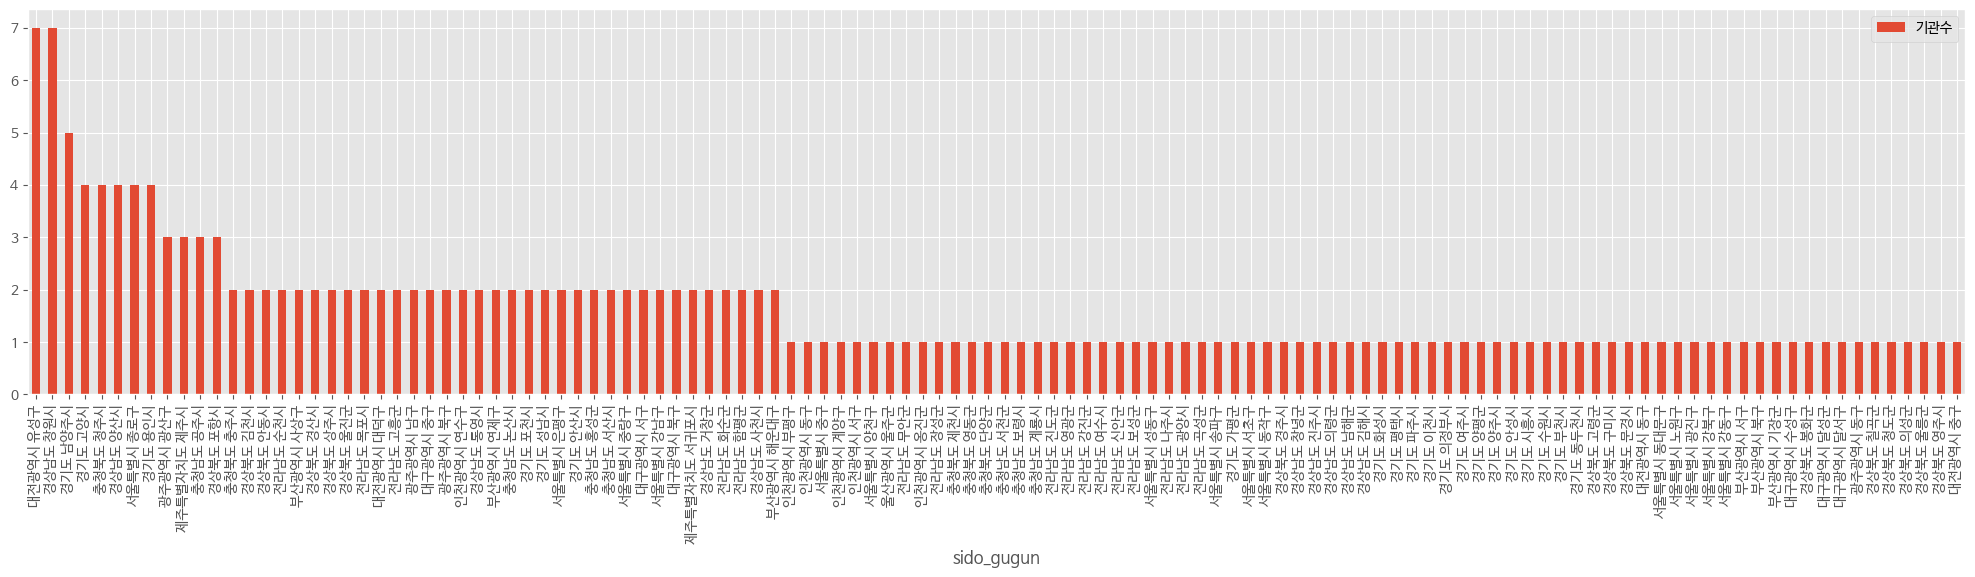

In [22]:
MC_count = local_population_rename[['기관수']]
MC_count = MC_count.sort_values('기관수', ascending = False)

plt.rcParams['figure.figsize']=(25,5)
MC_count.plot(kind='bar',rot=90)

plt.show()

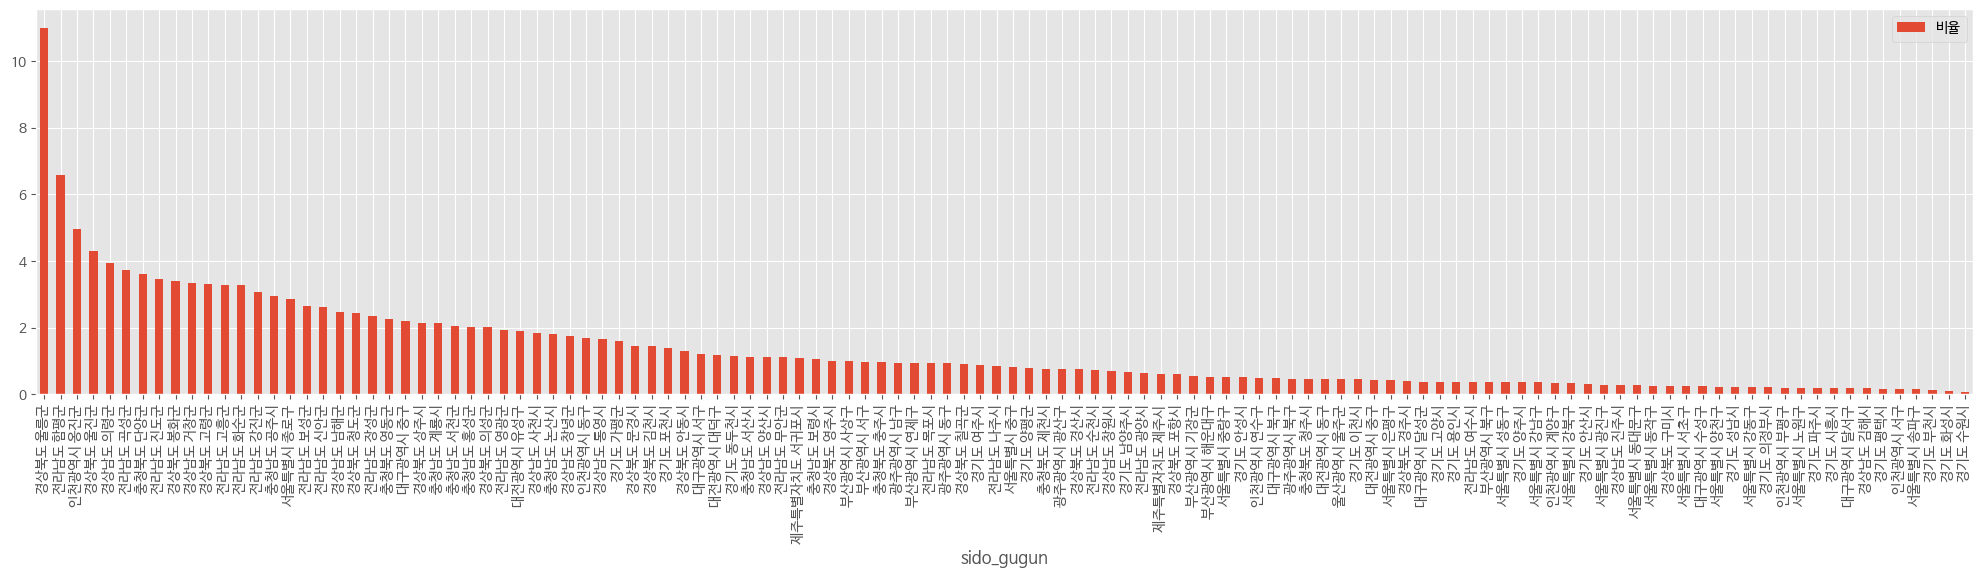

In [24]:
MC_ratio = local_population_rename[['비율']]
MC_ratio = MC_ratio.sort_values('비율', ascending = False)

plt.rcParams['figure.figsize']=(25,5)
MC_ratio.plot(kind='bar',rot=90)

plt.show()